In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("第03周/MNIST_data",one_hot=True)

Instructions for updating:
Please use tf.data to implement this functionality.
Extracting 第03周/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting 第03周/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting 第03周/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting 第03周/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
print('训练数据：',mnist.train.images)
print('训练数据打印shape：',mnist.train.images.shape)

输入数据： [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打印shape： (55000, 784)


In [9]:
import pylab #图形打印类

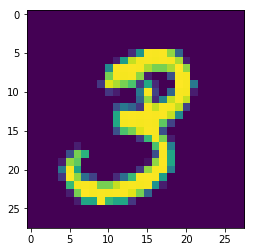

In [12]:
im=mnist.train.images[1]
im=im.reshape(-1,28) #将图由一行784个像素，转换成28*28像素的图像
pylab.imshow(im)
pylab.show()

In [14]:
print('测试数据打印shape',mnist.test.images.shape)
print('验证数据打印shape',mnist.validation.images.shape)

测试数据打印shape (10000, 784)
验证数据打印shape (5000, 784)


### mnist 分类

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('第03周/MNIST_data',one_hot=True)

Extracting 第03周/MNIST_data\train-images-idx3-ubyte.gz
Extracting 第03周/MNIST_data\train-labels-idx1-ubyte.gz
Extracting 第03周/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting 第03周/MNIST_data\t10k-labels-idx1-ubyte.gz


In [16]:
tf.reset_default_graph()

#### 搭建模型

In [17]:
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])

In [18]:
W=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.zeros([10]))

### 预测的是属于某一个类别的概论，总和为1 ，例如[0.2,0.6,0.2]

In [19]:
pred=tf.nn.softmax(tf.matmul(X,W) + b)  # softmax 分类  

### 反向传播，将生成的pred与样本标签Y进行一次交叉熵运算最小化误差cost

In [22]:
cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred),reduction_indices=1))
#cost=tf.nn.softmax_cross_entropy_with_logits(tf.matmul(X,W) + b)

In [24]:
learning_rate=0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [26]:
training_epochs=20
batch_size=100
display_step=1
saver=tf.train.Saver()
model_path='log/mnist_model.ckpt'

In [31]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size) # 每一轮训练多少批次
        #遍历全部数据
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,c=sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_ys})
            
            #计算平均值以使误差值更加平均
            avg_cost += c / total_batch
            
        #显示训练中详细信息
        if (epoch+1) % display_step == 0:
            print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))
    print('Finished')
    
    #测试模型
    correct_pred=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
    #计算准确率
    accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32)) #cast函数，将correct_pred数据类型转换成float32
    
    #print('Accuracy:',accuracy.eval({X:mnist.test.images,Y:mnist.test.labels}))
    print('Accuracy:',sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))
    
    #存储模型
    model=saver.save(sess,model_path)
    print('Model saved in file: %s'%model)

Epoch: 0001 cost= 9.805365619
Epoch: 0002 cost= 4.871370925
Epoch: 0003 cost= 3.325461086
Epoch: 0004 cost= 2.638523468
Epoch: 0005 cost= 2.236332992
Epoch: 0006 cost= 1.968657412
Epoch: 0007 cost= 1.777445419
Epoch: 0008 cost= 1.633242547
Epoch: 0009 cost= 1.520205070
Epoch: 0010 cost= 1.429275612
Epoch: 0011 cost= 1.353832946
Epoch: 0012 cost= 1.290501630
Epoch: 0013 cost= 1.236187476
Epoch: 0014 cost= 1.189086647
Epoch: 0015 cost= 1.147685652
Epoch: 0016 cost= 1.111217419
Epoch: 0017 cost= 1.078281146
Epoch: 0018 cost= 1.048949225
Epoch: 0019 cost= 1.022129355
Epoch: 0020 cost= 0.997836063
Finished
Accuracy: 0.8088
Model saved in file: log/mnist_model.ckpt


### 读取模型，使用模型

In [38]:
saver=tf.train.Saver()
model_path='log/mnist_model.ckpt'
with tf.Session() as sess2:
    tf.global_variables_initializer().run()
    saver.restore(sess2,model_path)
    print(saver)
    
    correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print('Accuracy:',accuracy.eval({X:mnist.test.images,Y:mnist.test.labels}))
    
    output=tf.argmax(pred,1)
    
    #获取两个手写数字，并使用模型进行预测
    batch_xs,batch_ys=mnist.train.next_batch(2)
    outputval,predv=sess2.run([output,pred],feed_dict={X:batch_xs})
    print(outputval)
    print(predv)
    print(batch_ys)

INFO:tensorflow:Restoring parameters from log/mnist_model.ckpt
Accuracy: 0.8088
[8 8]
[[1.75489359e-10 5.34137188e-12 3.69386847e-11 5.26675831e-06
  4.98697510e-08 5.88517031e-03 7.34526606e-11 7.69147861e-14
  9.94109511e-01 1.00122126e-10]
 [2.53181587e-10 4.66715101e-05 1.23578624e-13 3.12900622e-10
  6.96349161e-05 1.89695030e-03 9.77665164e-15 4.50800061e-02
  9.52906430e-01 2.21325976e-07]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
